### beautiful soup

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpathces

### url 에 접근하고 HTML 소스를 집하여 필요한 정보를 얻는 function

In [2]:
def get_cse_lab(url):
    reponse = requests.get(url)
    soup = BeautifulSoup(reponse.text, 'html.parser')
    content = soup.select_one('#data')

    headers = [hearder.text.strip() for hearder in content.find_all('th')]
    rows = content.find('tbody').find_all('tr')
    items = [{head: value.get_text().strip() for head, value in zip(headers, row.find_all('td'))} for row in rows]

    return items

### 주어진 url로 접근해 얻은 데이터를 pandas frame 으로 변경후 barh plot으로 시각화 
### x축 AVG 값 Y축 player name

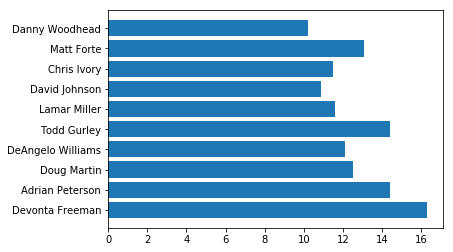

In [3]:
url = 'https://www.fantasypros.com/nfl/reports/leaders/rb.php?year=2015&start=1&end=17'
table = get_cse_lab(url)
df = pd.DataFrame(table)


df1 = df[:10]
s = df1['Avg'].values
a = df1['Player'].values
d = np.arange(len(a))
e = list(map(lambda x: float(x),s))
plt.barh(df1['Player'],e)
plt.show()

####  Re Module

In [4]:
import re

In [5]:
# 1
string ="Earth is the third planet from the Sun"
s = []
for i in string.split(' '):
    s.append(re.findall(r'^[\w]{2}',i)[0])

s

['Ea', 'is', 'th', 'th', 'pl', 'fr', 'th', 'Su']

In [6]:
# 2
string = 'abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz'
s = []
for i in string.split(', '):
    domain = re.search(r'@[\w.]+',i)
    # sub으로 하기
    s.append(domain.group())
s

['@gmail.com', '@test.in', '@analyticsvidhya.com', '@rest.biz']

In [7]:
# 3
string = 'Amit 34-3456 12-05-2007, XYZ 56-4532 11-11-2011, ABC 67-8945 12-01-2009'
s = []
for i in string.split(', '):
    date = re.search(r'\d{2}-\d{2}-\d{4}', i)
    s.append(date.group())
s

['12-05-2007', '11-11-2011', '12-01-2009']

In [8]:
# 4
string = "Earth's gravity interacts with other objects in space, especially the Sun and the Moon."
s = []
for i in string.split(' '):
    vowel = re.match(r'\b[aeiouAEIOU]\w*',i)
    if vowel:
        s.append(vowel.group())
s

['Earth', 'interacts', 'other', 'objects', 'in', 'especially', 'and']

In [9]:
# 5
lst = ['010-256-1354', '010-1234-5576', '070-642-0384', '010-290*-4858', '0105734123']
s =[]
for num in lst:
    phone = re.match(r'010-\d{3,4}-\d{4}',num)
    if phone:
        s.append("yes")
    else:
        s.append("no")

s

['yes', 'yes', 'no', 'no', 'no']

In [47]:
from nltk.corpus import gutenberg as gu
import nltk
import re
import pandas as pd
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpathces

In [48]:
for file in gu.fileids():
    print(file)

hamlet = gu.words('shakespeare-hamlet.txt')
macbeth = gu.words('shakespeare-macbeth.txt')
caesar = gu.words('shakespeare-caesar.txt')
shakespeare = hamlet+macbeth+caesar
milton = gu.words('milton-paradise.txt')
jane = gu.words('austen-persuasion.txt')
herman = gu.words('melville-moby_dick.txt')

austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


###
# VER 1 : 작가별 doc_term_matrix 분석  (stopword 포함 )
###

### Frequency Class  : doc_term_matrix 생성 하는 Class

In [49]:
class Frequency:

    def __init__(self,word_list):
        self.word_list = [w.lower() for w in list(filter(lambda w: re.match(r'[\w]',w), word_list))]
        self.size = len(self.word_list)
        self.smaller_list = []
        self.fdist ={}
        self.doc_term_matrix = pd.DataFrame()

    def smaller(self):
        for i in range(self.size//5000 + 1):
            # print(self.word_list[5000*i:5000*(i+1)])
            self.smaller_list.append(self.word_list[5000*i:5000*(i+1)])

    def frequency(self,freqWords):
        self.doc_term_matrix = pd.DataFrame()
        for i in range(len(self.smaller_list)):
            temp = nltk.FreqDist(self.smaller_list[i])
            temp_fdist = [temp[key] for key in freqWords]
            self.doc_term_matrix['%d'%i] = pd.Series(temp_fdist,index=freqWords)
        self.doc_term_matrix.index = freqWords

    def average(self):
        return self.doc_term_matrix.mean(axis=1)

### SVDProblem Class : SVD를 solve 하는 Class

In [50]:
class SVDProblem:
    def __init__(self,doc_term_matrix):
        self.doc_term_matrix = doc_term_matrix[doc_term_matrix.sum(axis=1)>0]
        self.word_normalized = self.doc_term_matrix.sub(self.doc_term_matrix.mean(axis=1), axis=0).divide(self.doc_term_matrix.std(axis=1), axis=0)
        # self.doc_normalized = (self.doc_term_matrix-self.doc_term_matrix.mean(axis=0))
        self.U = None

    def SVD(self,key=None):
        if key == 'word':
            self.U, _, _ = svd(self.word_normalized)
        elif key == 'doc':
            _, _, self.U = svd(self.word_normalized)
        else:
            print('Insert KEY')

    def plot(self, key=None, color = None):
        if key == 'word':
            u = pd.DataFrame(self.U)
            X = u[0]
            Y = u[1]
            plt.scatter(X, Y, c = color)
            for i, txt in enumerate(self.doc_term_matrix.index):
                plt.annotate(txt, (X[i], Y[i]))
        elif key == 'doc':
            u = pd.DataFrame(self.U.transpose())
            X = u[0]
            Y = u[1]
            plt.scatter(X, Y, c = color)
            # plt.title(title)

### 각 작가별로 Class instance를 선언한다

In [51]:
S = Frequency(shakespeare)
M = Frequency(milton)
J = Frequency(jane)
H = Frequency(herman)

### 셰익스피어 작품의 경우 'have'가 'haue'로 표기되어 있어 이에 대한 전처리가 필요함

In [52]:
for i,word in enumerate(S.word_list):
    if word == 'haue':
        S.word_list[i] = 'have'

### 전체 상위 50개 단어를 추출

In [53]:
total = S.word_list + M.word_list + J.word_list + H.word_list

fdist = nltk.FreqDist(total)
fdist
freqList = fdist.most_common(50)
freqWords = [w for w,_ in freqList]

### 작가별로 doc_term_matrix 생성

In [54]:
S.smaller()
S.frequency(freqWords)

M.smaller()
M.frequency(freqWords)

J.smaller()
J.frequency(freqWords)

H.smaller()
H.frequency(freqWords)

### 작가별 평균치 계산및 plot

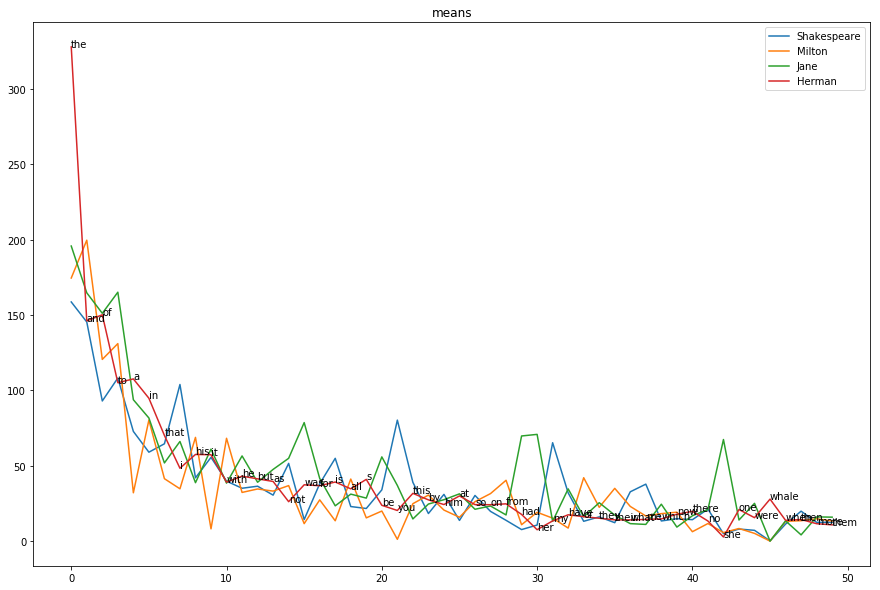

In [55]:
df_avg = pd.DataFrame()
df_avg['Shakespeare'] = S.average()
df_avg['Milton'] = M.average()
df_avg['Jane'] = J.average()
df_avg['Herman'] = H.average()
df_avg.index = list(range(50))


fig = plt.figure(figsize=(15,10))
ax = fig.gca()
df_avg.plot(ax=ax)
for i, txt in enumerate(freqWords):
    plt.annotate(txt, (df_avg.index[i],df_avg.Herman[i]))
plt.title('means')
plt.show()

###  작가별로 SVDProblem instance를 생성한다

In [56]:
S_svd = SVDProblem(S.doc_term_matrix)
M_svd = SVDProblem(M.doc_term_matrix)
J_svd = SVDProblem(J.doc_term_matrix)
H_svd = SVDProblem(H.doc_term_matrix)

### 단어 분포 시각화

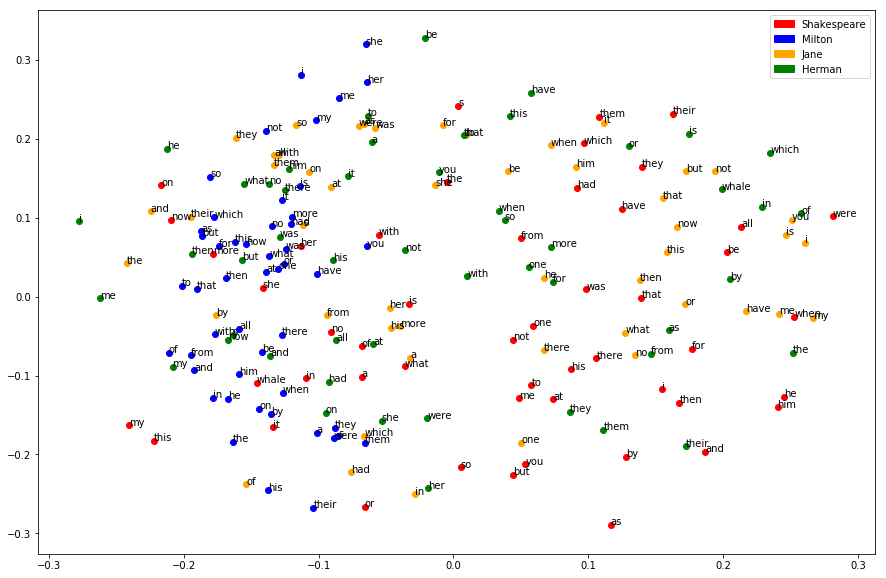

In [58]:


plt.figure(figsize=(15,10))
S_svd.SVD('word')
S_svd.plot(key='word',color='red')
M_svd.SVD('word')
M_svd.plot(key='word',color='blue')
J_svd.SVD('word')
J_svd.plot(key='word',color='orange')
H_svd.SVD('word')
H_svd.plot(key='word',color='green')
red_patch = mpathces.Patch(color='red', label='Shakespeare')
blue_patch = mpathces.Patch(color='blue', label='Milton')
orange_patch = mpathces.Patch(color='orange', label='Jane')
green_patch = mpathces.Patch(color='green',label='Herman')
plt.legend(handles=[red_patch,blue_patch,orange_patch,green_patch])
plt.show()

### 문서 분포

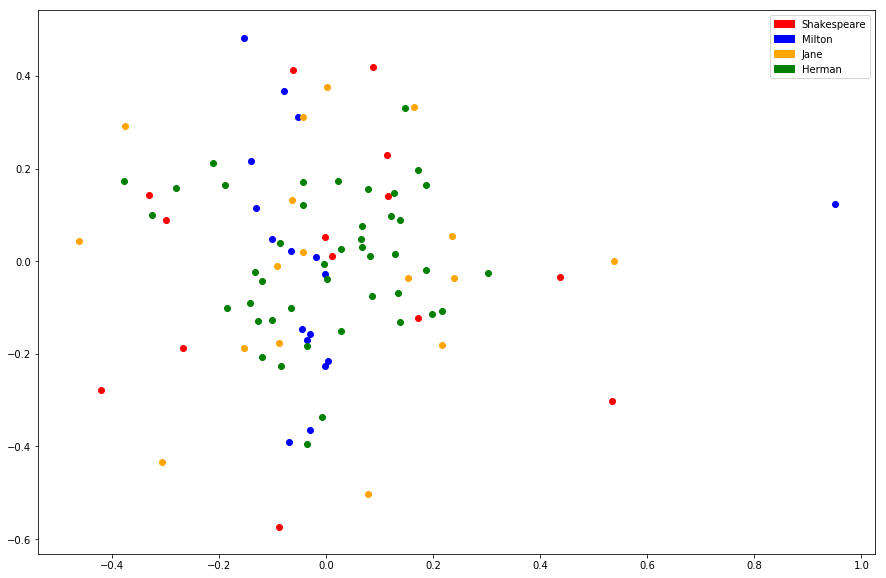

In [59]:
plt.figure(figsize = (15,10))
S_svd.SVD('doc')
S_svd.plot(key='doc', color='red')
M_svd.SVD('doc')
M_svd.plot(key='doc', color='blue')
J_svd.SVD('doc')
J_svd.plot(key='doc', color='orange')
H_svd.SVD('doc')
H_svd.plot(key='doc', color='green')
plt.legend(handles=[red_patch,blue_patch,orange_patch,green_patch])
plt.show()

###
# VER 2 : 작가별 doc_term_matrix 분석  (stopword 제외 )
###

###  stop word 제외

In [60]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

### 전체 상위 50개 단어를 추출 (stop word 제외)

In [61]:
total2 = list(filter(lambda w: w not in stop, total))
fdist2 = nltk.FreqDist(total2)
freqList2 = fdist2.most_common(50)
freqWords2 = [w for w,_ in freqList2]

S.frequency(freqWords2)

M.frequency(freqWords2)

J.frequency(freqWords2)

H.frequency(freqWords2)

### 작가별 평균치 계산및 plot


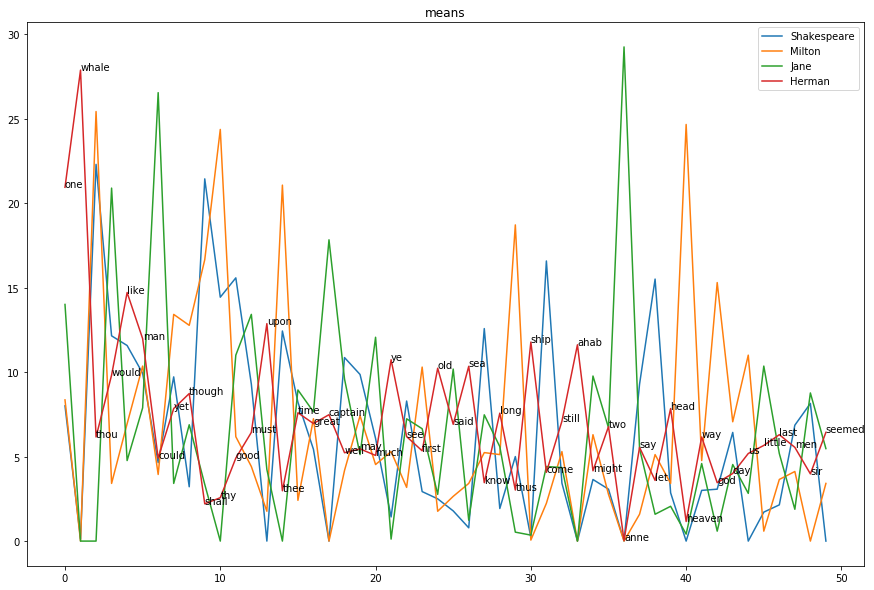

In [62]:
df_avg = pd.DataFrame()
df_avg['Shakespeare'] = S.average()
df_avg['Milton'] = M.average()
df_avg['Jane'] = J.average()
df_avg['Herman'] = H.average()
df_avg.index = list(range(50))

fig = plt.figure(figsize=(15,10))
ax = fig.gca()
df_avg.plot(ax=ax)
for i, txt in enumerate(freqWords2):
    plt.annotate(txt, (df_avg.index[i],df_avg.Herman[i]))
plt.title('means')
plt.show()

###  작가별로 SVDProblem instance를 생성한다

In [63]:
S_svd = SVDProblem(S.doc_term_matrix)
M_svd = SVDProblem(M.doc_term_matrix)
J_svd = SVDProblem(J.doc_term_matrix)
H_svd = SVDProblem(H.doc_term_matrix)

### 단어 분포 시각화

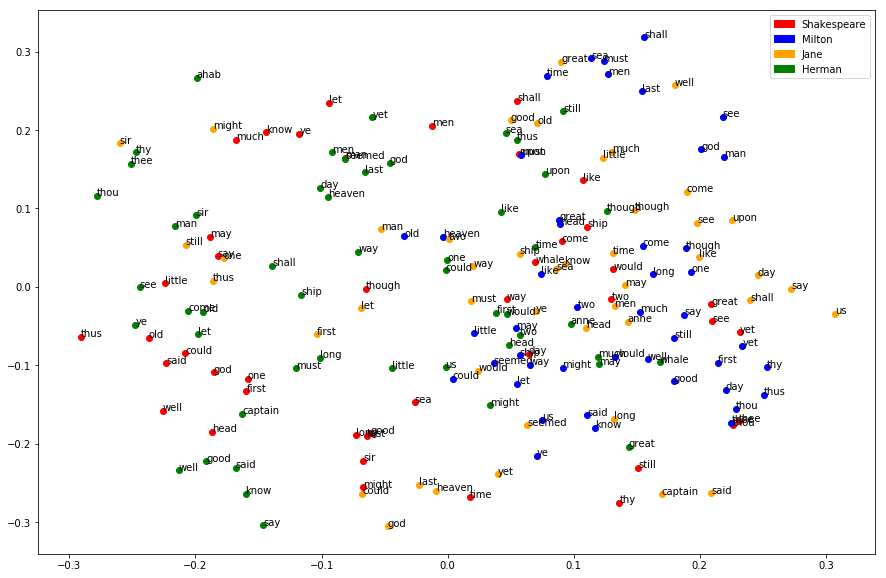

In [64]:
plt.figure(figsize = (15,10))
S_svd.SVD('word')
S_svd.plot(key='word',color='red')
M_svd.SVD('word')
M_svd.plot(key='word',color='blue')
J_svd.SVD('word')
J_svd.plot(key='word',color='orange')
H_svd.SVD('word')
H_svd.plot(key='word',color='green')
plt.legend(handles=[red_patch,blue_patch,orange_patch,green_patch])
plt.show()

### 문서분포

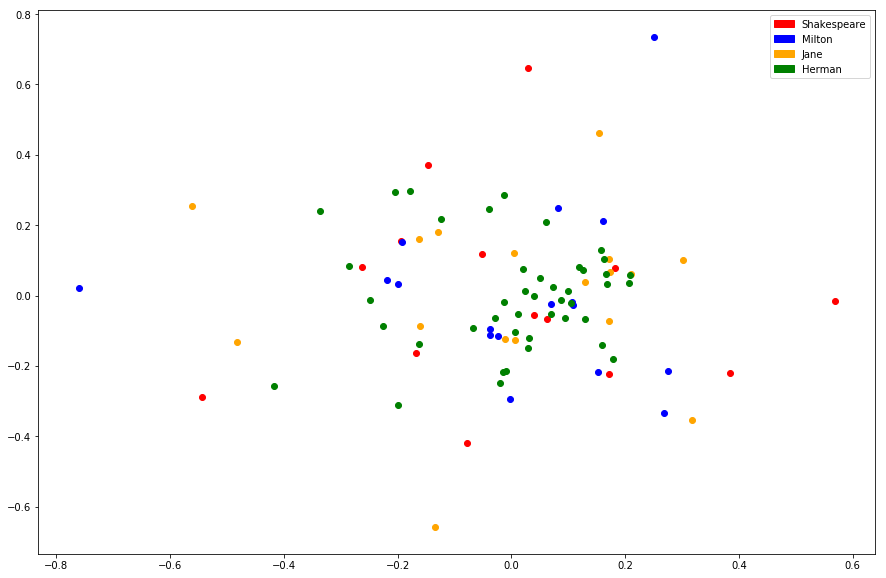

In [65]:
plt.figure(figsize=(15,10))
S_svd.SVD('doc')
S_svd.plot(key='doc', color='red')
M_svd.SVD('doc')
M_svd.plot(key='doc', color='blue')
J_svd.SVD('doc')
J_svd.plot(key='doc', color='orange')
H_svd.SVD('doc')
H_svd.plot(key='doc', color='green')
plt.legend(handles=[red_patch,blue_patch,orange_patch,green_patch])
plt.show()

###
# VER 3 : 작가 전체 doc_term_matrix 분석  (stopword 포함 )
###

### 작가 전체 doc_term_matrix 생성


In [67]:
S.frequency(freqWords)
M.frequency(freqWords)
J.frequency(freqWords)
H.frequency(freqWords)

In [68]:
total_doc_term = pd.DataFrame()
total_doc_term = total_doc_term.append(S.doc_term_matrix.transpose(),ignore_index=True) # 17
total_doc_term = total_doc_term.append(M.doc_term_matrix.transpose(),ignore_index=True) # 17
total_doc_term = total_doc_term.append(J.doc_term_matrix.transpose(), ignore_index=True) # 17
total_doc_term = total_doc_term.append(H.doc_term_matrix.transpose(), ignore_index=True) # 44

### total_doc_term 을 normalize 한다

In [69]:
norm = (total_doc_term-total_doc_term.mean(axis=0))/total_doc_term.std(axis=0)
norm = norm.sub(norm.mean(axis=1),axis=0)

### SVD를 수행한다

In [70]:
Doc, U, Wordt = svd(norm, full_matrices=False)
Word = Wordt.transpose()

### word 분포

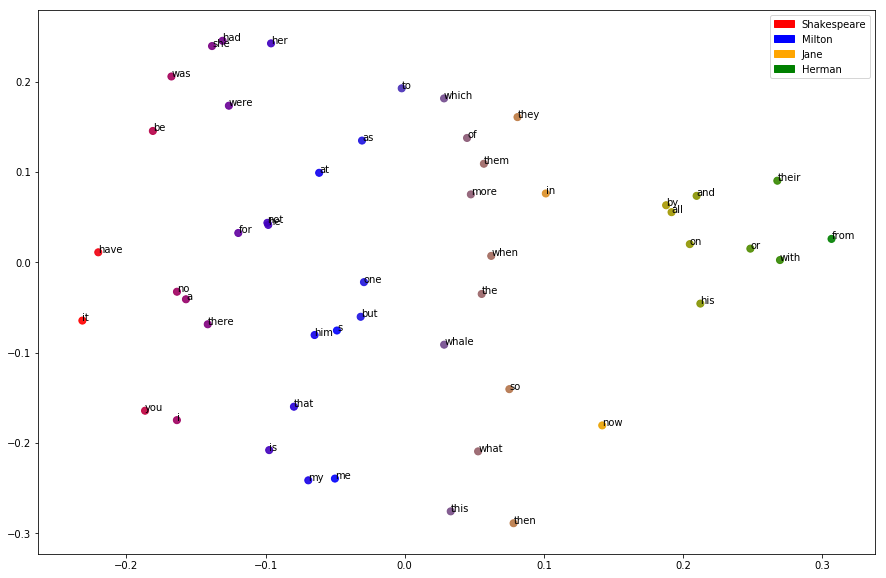

In [71]:
plt.figure(figsize=(15,10))
X = Word[:, 0]
Y = Word[:, 1]
plt.scatter(X, Y, s=50, alpha=0.9, c = X,
        cmap=LinearSegmentedColormap.from_list('BlGr',['red','blue','orange','green']))
for i, txt in enumerate(total_doc_term.columns):
    plt.annotate(txt, (X[i], Y[i]))
plt.legend(handles=[red_patch,blue_patch,orange_patch,green_patch])
plt.show()

### 문서 분포

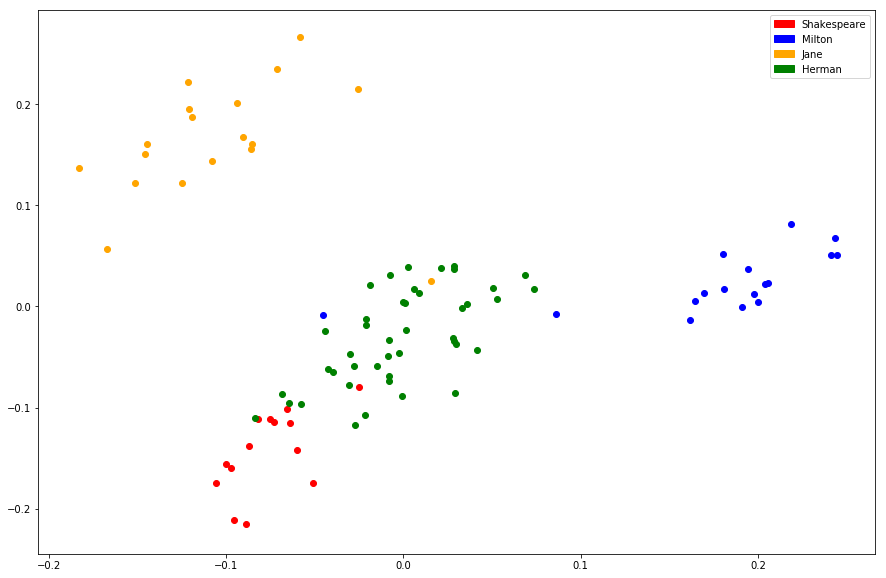

In [72]:
plt.figure(figsize = (15,10))
plt.scatter(Doc[:14, 0], Doc[:14, 1], color = 'red')
plt.scatter(Doc[14:31, 0], Doc[14:31, 1], color = 'blue')
plt.scatter(Doc[31:49, 0], Doc[31:49, 1], color = 'orange')
plt.scatter(Doc[49:, 0], Doc[49:, 1], color = 'green')
plt.legend(handles=[red_patch,blue_patch,orange_patch,green_patch])
plt.show()

###
# VER 4 : 작가 전체 doc_term_matrix 분석  (stopword 제외 )
###

### stop word제외 한 doc_term_matrix

In [73]:
S.frequency(freqWords2)
M.frequency(freqWords2)
J.frequency(freqWords2)
H.frequency(freqWords2)

In [74]:
total_doc_term = pd.DataFrame()
total_doc_term = total_doc_term.append(S.doc_term_matrix.transpose(), ignore_index=True) # 14
total_doc_term = total_doc_term.append(M.doc_term_matrix.transpose(),ignore_index=True) # 17
total_doc_term = total_doc_term.append(J.doc_term_matrix.transpose(), ignore_index=True) # 17
total_doc_term = total_doc_term.append(H.doc_term_matrix.transpose(), ignore_index=True) # 44

###  total_doc_term_matrix를 nomalize한다

In [75]:
norm = (total_doc_term-total_doc_term.mean(axis=0))/total_doc_term.std(axis=0)
norm = norm.sub(norm.mean(axis=1),axis=0)

### SVD를 수행한다

In [76]:
Doc, U, Wordt = svd(norm, full_matrices=False)
Word = Wordt.transpose()

### word 분포

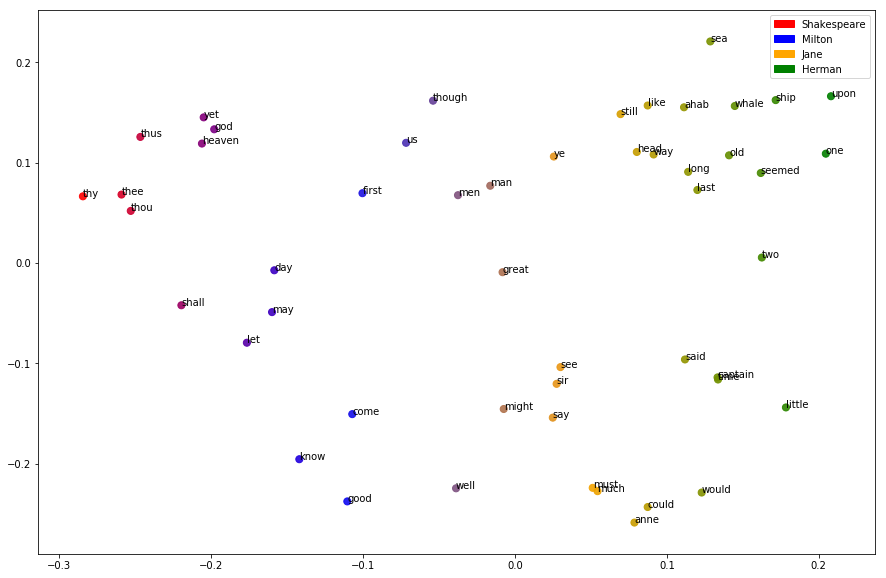

In [77]:
plt.figure(figsize = (15,10))
X = Word[:, 0]
Y = Word[:, 1]
plt.scatter(X, Y, s=50, alpha=0.9, c = X,
        cmap=LinearSegmentedColormap.from_list('BlGr',['red','blue','orange','green']))
for i, txt in enumerate(total_doc_term.columns):
    plt.annotate(txt, (X[i], Y[i]))
    
plt.legend(handles=[red_patch,blue_patch,orange_patch,green_patch])
plt.show()

### 문서 분포

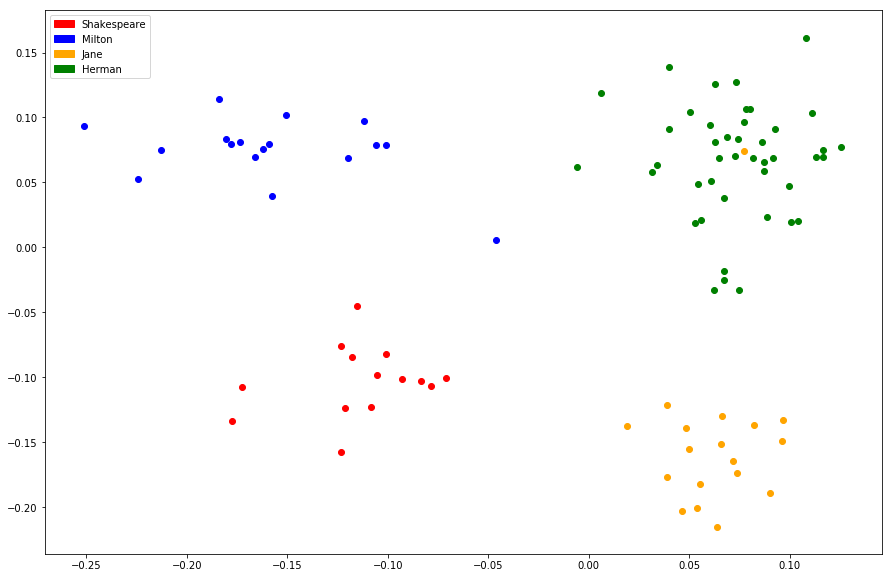

In [78]:
plt.figure(figsize = (15,10))
plt.scatter(Doc[:14, 0], Doc[:14, 1], color = 'red')
plt.scatter(Doc[14:31, 0], Doc[14:31, 1], color = 'blue')
plt.scatter(Doc[31:49, 0], Doc[31:49, 1], color = 'orange')
plt.scatter(Doc[49:, 0], Doc[49:, 1], color = 'green')
plt.legend(handles=[red_patch,blue_patch,orange_patch,green_patch])
plt.show()